最小生成树的边的权重之和: 63


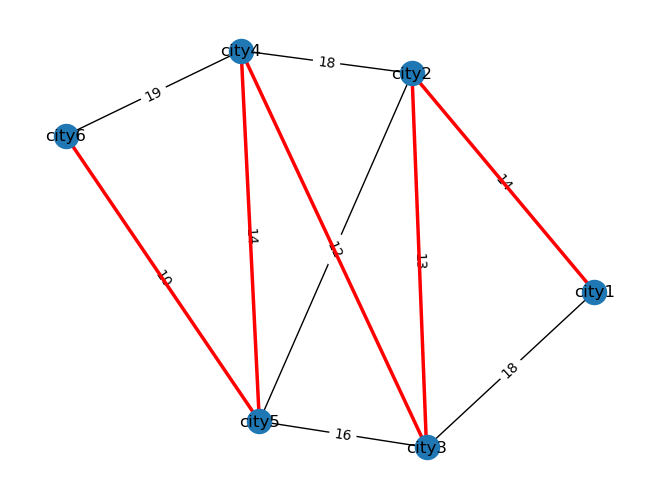

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体，如SimHei（黑体）
plt.rcParams['font.family'] = 'SimHei'

# 6个顶点，初始化定义6x6的全零矩阵作为邻接矩阵
a = [[0] * 6 for _ in range(6)]

# 注意，最小生成树是针对无向图的，每条边权重只需要设一次。1到2和2到1是同一条边
# 因此，可仅使用邻接矩阵的上三角矩阵来构造图G
a[0][1], a[0][2] = 14, 18  # 顶点1到其他顶点的边的权重
a[1][2], a[1][3], a[1][4] = 13, 18, 16  # 顶点2到顶点3、顶点4、顶点5的边的权重
a[2][3], a[2][4] = 12, 16  # 同上。因为写过1到3，和2到3的边的权重，无需重复设
a[3][4], a[3][5] = 14, 19
a[4][5] = 10

# 创建图
G = nx.Graph()
for i in range(6):
    for j in range(i + 1, 6):
        if a[i][j] != 0:
            G.add_edge(f'city{i + 1}', f'city{j + 1}', weight=a[i][j])

# 绘制图G
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# 使用Kruskal算法求解最小生成树
T = nx.minimum_spanning_tree(G, algorithm='kruskal')

# 对最小生成树的边的权重求和
L = sum([data['weight'] for u, v, data in T.edges(data=True)])
print(f"最小生成树的边的权重之和: {L}")

# 突出显示最小生成树的边
mst_edges = [(u, v) for u, v in T.edges()]
nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='red', width=2.5)

# 显示图形
plt.show()